In [1]:
import numpy as np
import pandas as pd
filename = "datasets-uci-iris.csv"
treino = pd.read_csv( filename, header=None, sep = ',', names = ['sepal_length','sepal_width','petal_length','petal_width','target']) 

In [2]:
treino.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
type(treino.target[0])

str

In [4]:
import matplotlib.pyplot as plt
colors = []
setosa = []
versicolor = []
virginica = []
for i in treino.target:
    if i.find('setosa') != -1:
        colors.append(0)
        setosa.append(1)
        versicolor.append(0)
        virginica.append(0)
    elif i.find('versicolor') != -1:
        colors.append(1)
        setosa.append(0)
        versicolor.append(1)
        virginica.append(0)
    elif i.find('virginica') != -1:
        colors.append(2)
        setosa.append(0)
        versicolor.append(0)
        virginica.append(1)
colors

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

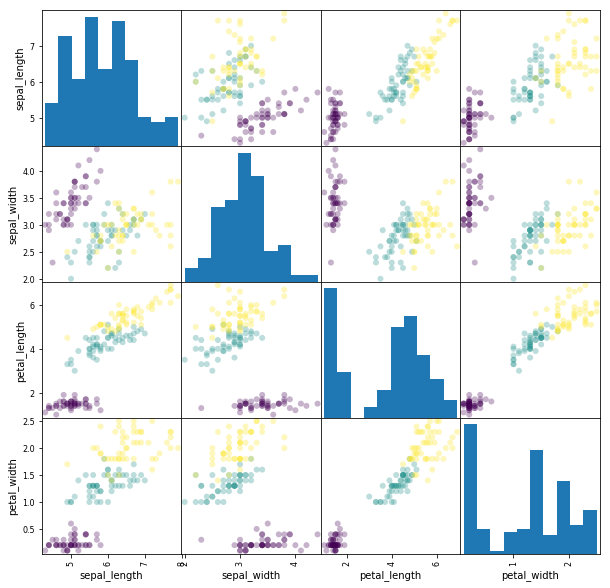

In [5]:
#palette = {0: "red", 1: "green", 2: "blue"}
#for c in np.nditer(rotulo): colors.append(palette[int(c)])
    # using the palette dictionary, we convert
    # each numeric class into a color string
dados = treino.loc[:,treino.columns != 'target']
scatterplot = pd.plotting.scatter_matrix(dados, alpha=0.3, figsize=(10,10), diagonal='hist', c=colors, marker='o',grid=True)
plt.show()

In [37]:
# Transforma o vetor y no y_, uma estrutura mais apropriada ao SVM
from sklearn import svm
#_setosa = np.array(setosa)
#_versicolor = np.array(versicolor)
#_virginica = np.array(virginica)
y = np.array(colors)

In [54]:
# Cria os conjuntos de treino e testes, a partir da massa de dados que temos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dados,y,random_state=41,test_size=.2)

#X_train_setosa, X_test_setosa, y_train_setosa, y_test_setosa = train_test_split(dados,_setosa,test_size=.1)
#X_train_versicolor, X_test_versicolor, y_train_versicolor, y_test_versicolor = train_test_split(dados,_versicolor,test_size=.1)
#X_train_virginica, X_test_virginica, y_train_virginica, y_test_virginica = train_test_split(dados,_virginica,test_size=.1)

# s = svm.SVC()
y_test

array([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2,
       0, 0, 1, 1, 1, 1, 0, 1])

In [39]:
from sklearn import preprocessing 

#Norm_X_train_setosa = preprocessing.normalize(X_train_setosa)
#Norm_X_train_versicolor = preprocessing.normalize(X_train_versicolor)
#Norm_X_train_virginica = preprocessing.normalize(X_train_virginica)

Norm_X_train = preprocessing.normalize(X_train)
Norm_X_test = preprocessing.normalize(X_test)

#Norm_X_test_setosa = preprocessing.normalize(X_test_setosa)
#Norm_X_test_versicolor = preprocessing.normalize(X_test_versicolor)
#Norm_X_test_virginica = preprocessing.normalize(X_test_virginica)
#Norm_X_train_setosa

In [48]:
# Como rodar independentemente do algoritmo que procura otimizar parâmetros
sm = svm.SVC(kernel='rbf', C=1).fit(Norm_X_train,y_train)
#s = svm.SVC(kernel='rbf', C=0.100).fit(Norm_X_train_setosa,y_train_setosa)            

C:\Users\Fabiano\Anaconda3_Novo\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
y_pred = sm.predict(Norm_X_test)
y_pred

#ypred_setosa = s.predict(Norm_X_test_setosa)
#ypred_versicolor = s.predict(Norm_X_test_versicolor)
#ypred_virginica = s.predict(Norm_X_test_virginica)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 0, 2])

In [50]:
sm.score(Norm_X_test,y_pred)

1.0

In [57]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average=None)
recall = metrics.recall_score(y_test, y_pred, average=None)

#accuracy_setosa = metrics.accuracy_score(ypred_setosa,y_test_setosa)
#precision_setosa = metrics.precision_score(ypred_setosa,y_test_setosa)
#recall_setosa = metrics.precision_score(ypred_setosa,y_test_setosa)

#accuracy_versicolor = metrics.accuracy_score(ypred_versicolor,y_test_versicolor)
#precision_versicolor = metrics.precision_score(ypred_versicolor,y_test_versicolor)
#recall_versicolor = metrics.precision_score(ypred_versicolor,y_test_versicolor)

#accuracy_virginica = metrics.accuracy_score(ypred_virginica,y_test_virginica)
#precision_virginica = metrics.precision_score(ypred_virginica,y_test_virginica)
#recall_virginica = metrics.precision_score(ypred_virginica,y_test_virginica)

In [58]:
#print("Acurácia:", accuracy_setosa, " Precisão:", precision_setosa, " Recall:", recall_setosa)
#print("Acurácia:", accuracy_versicolor, " Precisão:", precision_versicolor, " Recall:", recall_versicolor)
#print("Acurácia:", accuracy_virginica, " Precisão:", precision_virginica, " Recall:", recall_virginica)

print("Accuracy:", accuracy, " Precision:", precision, " Recall:", recall)

Accuracy: 0.6333333333333333  Precision: [1.         0.         0.47619048]  Recall: [1. 0. 1.]
